## Importing Library

In [856]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statistics
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
df = pd.read_csv('tripadvisor_review.csv')
df.head(n=2)

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32


## RENAMING COLUMNS

In [857]:
df.columns

Index(['User ID', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10'],
      dtype='object')

In [858]:
df.rename(columns={'User ID':'user_id' , 'Category 1':'art_galleries' , 'Category 2':'dance_clubs', 'Category 3':'juice_bars', 'Category 4':'restaurants',
       'Category 5':'museums', 'Category 6':'resorts', 'Category 7':'parks_picnicspots', 'Category 8':'beaches','Category 9':'theatres',
       'Category 10':'religious_inst'}, inplace=True )

In [859]:
df.columns

Index(['user_id', 'art_galleries', 'dance_clubs', 'juice_bars', 'restaurants',
       'museums', 'resorts', 'parks_picnicspots', 'beaches', 'theatres',
       'religious_inst'],
      dtype='object')

## Checking for duplicates

In [860]:
df = df.drop_duplicates()

In [861]:
df.isnull().sum()

user_id              0
art_galleries        0
dance_clubs          0
juice_bars           0
restaurants          0
museums              0
resorts              0
parks_picnicspots    0
beaches              0
theatres             0
religious_inst       0
dtype: int64

## Checking how data is spread out

In [862]:
df.describe()

,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,parks_picnicspots,beaches,theatres,religious_inst
count,980.00,980.00,980.00,980.00,980.00,980.00,9.80e+02,980.00,980.00,980.00
mean,0.89,1.35,1.01,0.53,0.94,1.84,3.18e+00,2.84,1.57,2.80
std,0.33,0.48,0.79,0.28,0.44,0.54,7.82e-03,0.14,0.36,0.32
min,0.34,0.00,0.13,0.15,0.06,0.14,3.16e+00,2.42,0.74,2.14
25%,0.67,1.08,0.27,0.41,0.64,1.46,3.18e+00,2.74,1.31,2.54
50%,0.83,1.28,0.82,0.50,0.90,1.80,3.18e+00,2.82,1.54,2.78
75%,1.02,1.56,1.57,0.58,1.20,2.20,3.18e+00,2.91,1.76,3.04
max,3.22,3.64,3.62,3.44,3.30,3.76,3.21e+00,3.39,3.17,3.66


In [863]:
df.head(n=1)

,user_id,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,parks_picnicspots,beaches,theatres,religious_inst
0,User 1,0.93,1.8,2.29,0.62,0.8,2.42,3.19,2.79,1.82,2.42


In [864]:
pd.get_option('display.precision')

2

In [865]:
pd.set_option('display.precision',2)

## Creating new Columns for Averages

In [866]:
df['avg_indoor_entertain'] = df[['art_galleries', 'museums','dance_clubs','theatres']].mean(axis=1)
df['avg_outdoor_entertain'] = df[['parks_picnicspots','beaches']].mean(axis=1)
df['avg_overall'] = df.mean(axis=1)
df.head(n=1)

,user_id,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,parks_picnicspots,beaches,theatres,religious_inst,avg_indoor_entertain,avg_outdoor_entertain,avg_overall
0,User 1,0.93,1.8,2.29,0.62,0.8,2.42,3.19,2.79,1.82,2.42,1.34,2.99,1.95


In [867]:
df.avg_overall.describe()

count    980.00
mean       1.76
std        0.14
min        1.32
25%        1.66
50%        1.75
75%        1.86
max        2.23
Name: avg_overall, dtype: float64

In [869]:
df.mean()

art_galleries            0.89
dance_clubs              1.35
juice_bars               1.01
restaurants              0.53
museums                  0.94
resorts                  1.84
parks_picnicspots        3.18
beaches                  2.84
theatres                 1.57
religious_inst           2.80
avg_indoor_entertain     1.19
avg_outdoor_entertain    3.01
avg_overall              1.76
dtype: float64

## Mapping ratings to 5 categories

In [ ]:
def user_rating(rating):
    if rating >= 4:
        return "Excellent"
    elif rating >= 3:
        return "Very Good"
    elif rating >= 2:
        return "Average"
    elif rating >= 1:
        return "Poor"
    else:
        return "Terrible"

In [868]:
user_rating(2.3)

'Average'

## REVIEW OF RATINGS: 
## Highest RATING: Parks & Picnic Spots, Lowest RATING: Restaurants   

In [871]:
df.mean(axis=0).apply(user_rating)

art_galleries             Terrible
dance_clubs                   Poor
juice_bars                    Poor
restaurants               Terrible
museums                   Terrible
resorts                       Poor
parks_picnicspots        Very Good
beaches                    Average
theatres                      Poor
religious_inst             Average
avg_indoor_entertain          Poor
avg_outdoor_entertain    Very Good
avg_overall                   Poor
dtype: object

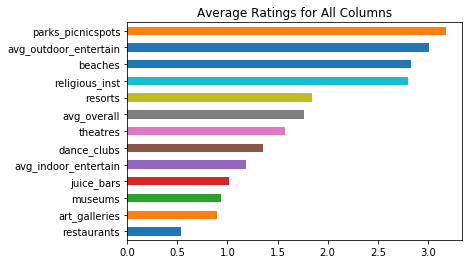

In [872]:
df.mean().sort_values(ascending = True).plot(kind = 'barh')
plt.title('Average Ratings for All Columns');

# RESTAURANTS ANALYSIS: comparing restaurnats with over all ratings
    

In [873]:
df['restaurants'].apply(user_rating).value_counts()

Terrible     949
Poor          22
Average        7
Very Good      2
Name: restaurants, dtype: int64

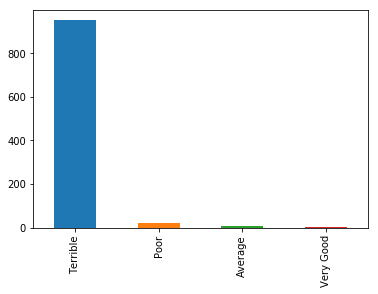

In [874]:
df['restaurants'].apply(user_rating).value_counts().plot(kind='bar');

C:\Users\Madhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


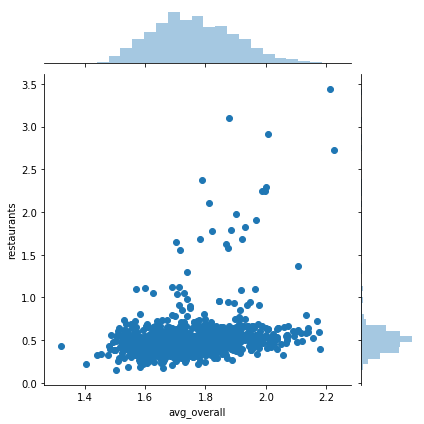

In [875]:
sns.jointplot(x = df['avg_overall'], y = df['restaurants']);

# RELIGIOUS INSTITUTIONS  RATING OVERVIEW

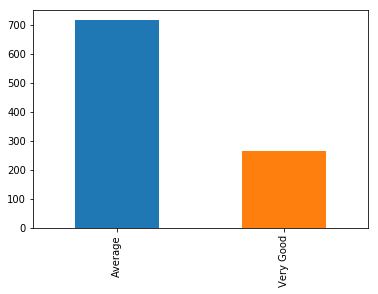

In [877]:
df['religious_inst'].apply(user_rating).value_counts().plot(kind='bar');

## DISTRIBUTION OF DATA: Ratings are not normally distributed

C:\Users\Madhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


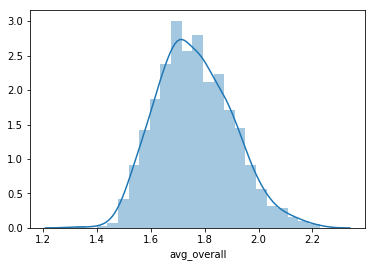

In [878]:
#df['avg_overall'].hist();
sns.distplot(df['avg_overall']);

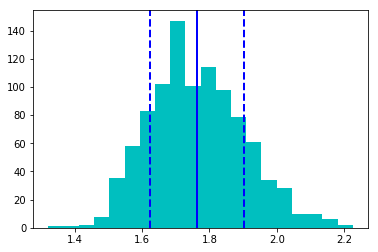

In [880]:
rating = df['avg_overall']
plt.hist(rating, bins=20, color='c')
plt.axvline(rating.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(rating.mean() + rating.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(rating.mean()-rating.std(), color='b', linestyle='dashed', linewidth=2) 
plt.show()

In [881]:
df['avg_overall'].apply(user_rating).value_counts()

Poor       924
Average     56
Name: avg_overall, dtype: int64

In [ ]:
from scipy.stats import chisquare
observed = [0, 0, 38, 942, 0]
expected = [196, 196, 196, 196, 196]
chi_statistic, p_value = chisquare(observed)
chi_statistic

In [ ]:
p_value

In [ ]:
chi_statistic, p_value = chisquare(observed,expected)
chi_statistic

In [ ]:
df['avg_overall'].describe()

In [889]:
t_statistic, p_value = ttest_ind(x, y)
t_statistic

-267.4713377467713

In [890]:
p_value

0.0

# Comparing Overall ratings to Indoor and Outdoor Entertainment

(array([0.       , 0.       , 0.4622449, 0.5377551]),
 array([0, 1, 2, 3, 4]),
 <a list of 4 Patch objects>)

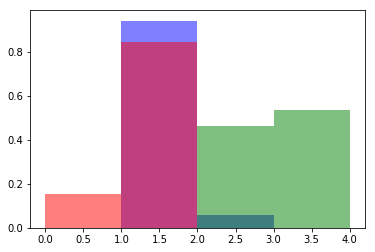

In [884]:
a = df['avg_overall']
b = df['avg_indoor_entertain']
c = df['avg_outdoor_entertain']
plt.hist(a, density=True, color='blue', bins=np.arange(0, 5), alpha=.5)
plt.hist(b ,density=True, color='red', bins=np.arange(0, 5), alpha=.5 ) 
plt.hist(c ,density=True, color='green', bins=np.arange(0, 5), alpha=.5 )

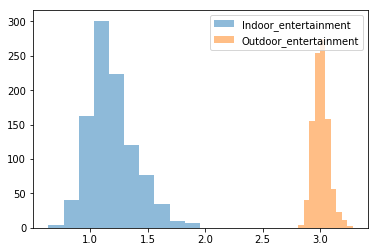

In [885]:
x = df['avg_indoor_entertain']
y = df['avg_outdoor_entertain']
plt.hist(x, alpha=0.5, label='Indoor_entertainment') 
plt.hist(y, alpha=0.5, label='Outdoor_entertainment') 
plt.legend(loc='upper right') 
plt.show()

# Correlation between different ratings

In [883]:
df.corr().round(decimals = 2)

,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,parks_picnicspots,beaches,theatres,religious_inst,avg_indoor_entertain,avg_outdoor_entertain,avg_overall
art_galleries,1.00,-0.19,0.01,0.07,-0.10,0.09,-0.01,0.02,-0.05,0.05,0.22,0.02,0.19
dance_clubs,-0.19,1.00,0.04,0.13,0.12,0.15,0.11,-0.16,0.07,-0.07,0.62,-0.15,0.43
juice_bars,0.01,0.04,1.00,0.06,0.28,0.36,0.75,-0.17,-0.09,-0.44,0.14,-0.13,0.58
restaurants,0.07,0.13,0.06,1.00,0.10,0.22,0.23,-0.10,0.03,-0.35,0.18,-0.09,0.29
museums,-0.10,0.12,0.28,0.10,1.00,0.58,0.23,-0.02,0.04,-0.25,0.59,-0.01,0.64
resorts,0.09,0.15,0.36,0.22,0.58,1.00,0.43,0.00,0.10,-0.44,0.49,0.02,0.74
parks_picnicspots,-0.01,0.11,0.75,0.23,0.23,0.43,1.00,-0.07,0.08,-0.71,0.22,-0.02,0.53
beaches,0.02,-0.16,-0.17,-0.10,-0.02,0.00,-0.07,1.00,0.17,0.11,-0.02,1.00,0.03
theatres,-0.05,0.07,-0.09,0.03,0.04,0.10,0.08,0.17,1.00,-0.05,0.50,0.17,0.31
religious_inst,0.05,-0.07,-0.44,-0.35,-0.25,-0.44,-0.71,0.11,-0.05,1.00,-0.17,0.07,-0.31


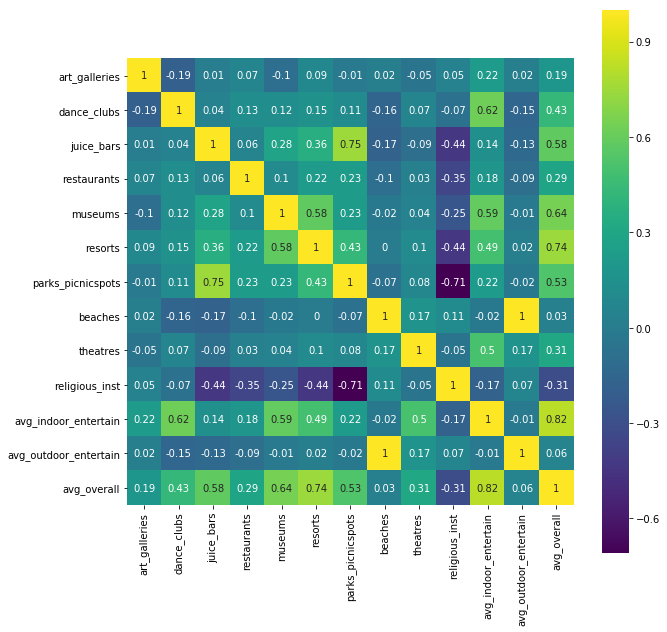

In [886]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr().round(decimals=2), annot = True, square = True, cmap = 'viridis')

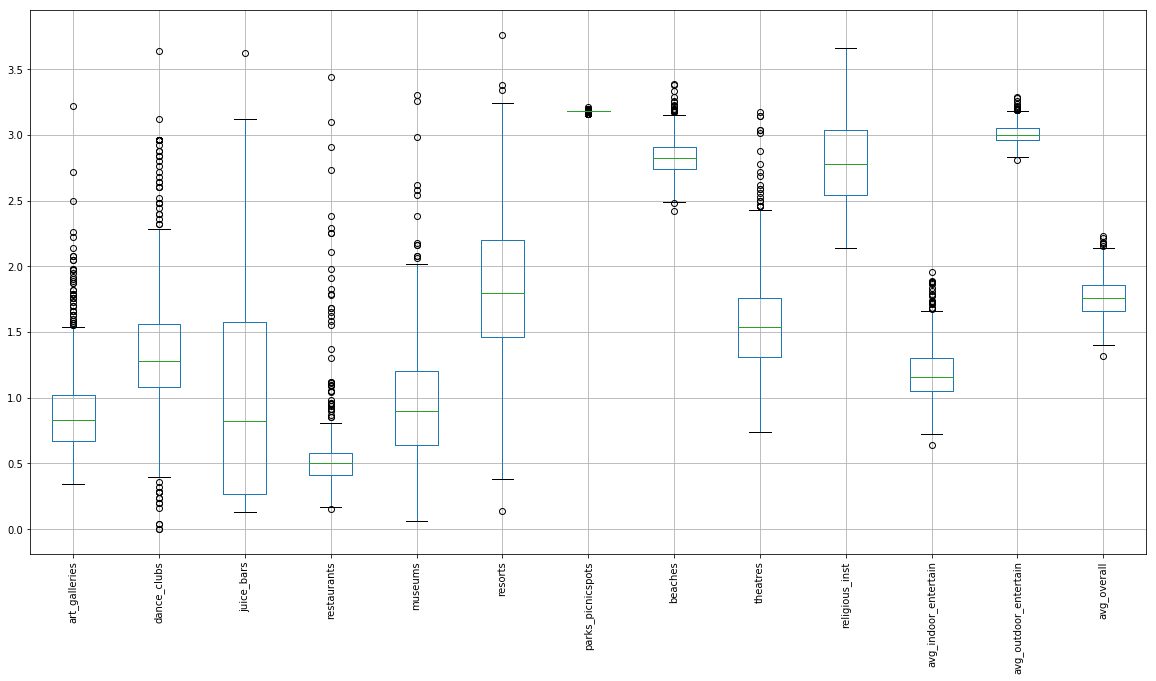

In [887]:
df.boxplot(figsize=(20,10))
plt.xticks(rotation=90);